## Problem 1.1.3

$$
  \left( \left(1 +\alpha_h \xi(\alpha_h) \right)\, \boldsymbol{S}^A_{\text{Diff}}\, +\, \alpha_h\,\boldsymbol{S}^A_{\text{Adv}}\right)\begin{bmatrix}
        u_{A-1}\\u_A\\u_{A+1}
    \end{bmatrix} = 0 $$
 becomes 
    $$
    \begin{bmatrix}
        -1 - \alpha_h - \alpha_h \xi(\alpha_h) & 2 + 2\alpha_h\xi(\alpha_h) & -1+ \alpha_h - \alpha_h\xi(\alpha_h)
    \end{bmatrix}\begin{bmatrix}
        1\\e^{2\alpha_h}\\e^{4\alpha_h}
    \end{bmatrix}e^{2(A-1)\alpha_h} = 0$$
    
 Thus
 $$(\alpha_h\xi(\alpha_h) +1)\big(-1 + 2 e^{2\alpha_h} - e^{4\alpha_h} \big) + \alpha_h\big(e^{4\alpha_h}-1\big)=0 $$
 
Finally noting that $\big(-1 + 2 e^{2\alpha_h} - e^{4\alpha_h} \big) = - \big(e^{2\alpha_h}-1 \big)^2$ and  $\,e^{4\alpha_h} - 1 = \big(e^{2\alpha_h}+1\big)\big(e^{2\alpha_h}-1\big)$, we thus have

$$\xi(\alpha_h) = \frac{e^{2\alpha_h}+1}{e^{2\alpha_h}-1} - \frac{1}{\alpha_h} = \boxed{\coth(\alpha_h) - \frac{1}{\alpha_h} }$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

## Problem 1.2

In [2]:
def XiFunction(h, a, kappa): 
    if kappa == 0:
        return 1
    elif a == 0:
        return 0
    else:
        alpha = a * h/ (2 * kappa)
        return 1/np.tanh(alpha) - 1/alpha
    
def KmatrixAssemble(N=11, a=1, kappa=1, XiFlag='SUPG'):
    h = 1/ N
    #alpha = alphaFunction(h, a, kappa)
    
    if XiFlag == 'SUPG':
        Xi = XiFunction(h, a, kappa)
    elif XiFlag ==  'Galerkin':
        Xi = 0
    else:
        Xi=0
        
    DiffusionStencil = np.array([-1, 2, -1 ])
    #print(DiffusionStencil.shape)
    AdvectionStencil = np.array([-1, 0, 1])
    
    K = np.zeros((N-1, N-1))
    K[0, 0:2] = (kappa / h + a * Xi / 2) *np.array([2, -1]) +  (a / 2) *np.array([0, 1])
    K[-1, -2:] = (kappa / h + a * Xi / 2) *np.array([-1, 2]) +  (a / 2) *np.array([-1, 0])
    for A in range(1,N-2):
        K[A, A-1:A+2] = (kappa / h + a * Xi / 2) * DiffusionStencil + (a / 2) * AdvectionStencil
    
    return K

def leftBoundaryVector(N=11, a=1, kappa=1, XiFlag='SUPG'):
    h = 1/ N
    #alpha = alphaFunction(h, a, kappa)
    
    if XiFlag == 'SUPG':
        Xi = XiFunction(h, a, kappa)
    elif XiFlag ==  'Galerkin':
        Xi = 0
    else:
        Xi=0
    
    B0 = np.zeros(N-1)
    B0[0] = (kappa / h + a * Xi / 2) *np.array([-1]) +  (a / 2) *np.array([-1])
    
    return B0

def rightBoundaryVector(N=11, a=1, kappa=1, XiFlag='SUPG'):
    h = 1/ N
    #alpha = alphaFunction(h, a, kappa)
    
    if XiFlag == 'SUPG':
        Xi = XiFunction(h, a, kappa)
    elif XiFlag ==  'Galerkin':
        Xi = 0
    else:
        Xi=0
    
    BN = np.zeros(N-1)
    BN[-1] = (kappa / h + a * Xi / 2) *np.array([-1]) +  (a / 2) *np.array([1])
    
    return BN  


def USolve(g0, g1, N=11, a=1, kappa=1, F = np.zeros(10), XiFlag='SUPG'):
    K = KmatrixAssemble(N=N, a=a, kappa=kappa, XiFlag = XiFlag)
    B0 = leftBoundaryVector(N=N, a=a, kappa=kappa, XiFlag=XiFlag)
    BN = rightBoundaryVector(N=N, a=a, kappa=kappa, XiFlag=XiFlag)
    
    U = np.zeros(N+1)
    U[0]= g0
    U[-1] = g1
    U[1:-1] = np.linalg.solve(K, F-g0*B0 - g1*BN )
    
    return U

def Uexact(a, kappa=1, N=11):
    Ux = np.zeros(N+1)
    xpoints = np.zeros(N+1)
    Ux[-1] = 1
    xpoints[-1] = 1
     
    for A in range(1, N):
        xpoints[A] = A/N
        if a == 0:
            Ux[A] = A/N
        else:
            Ux[A] = (np.exp(a * A / (kappa * N)) - 1) / (np.exp(a / kappa) - 1)
    
    return Ux, xpoints



<IPython.core.display.Javascript object>


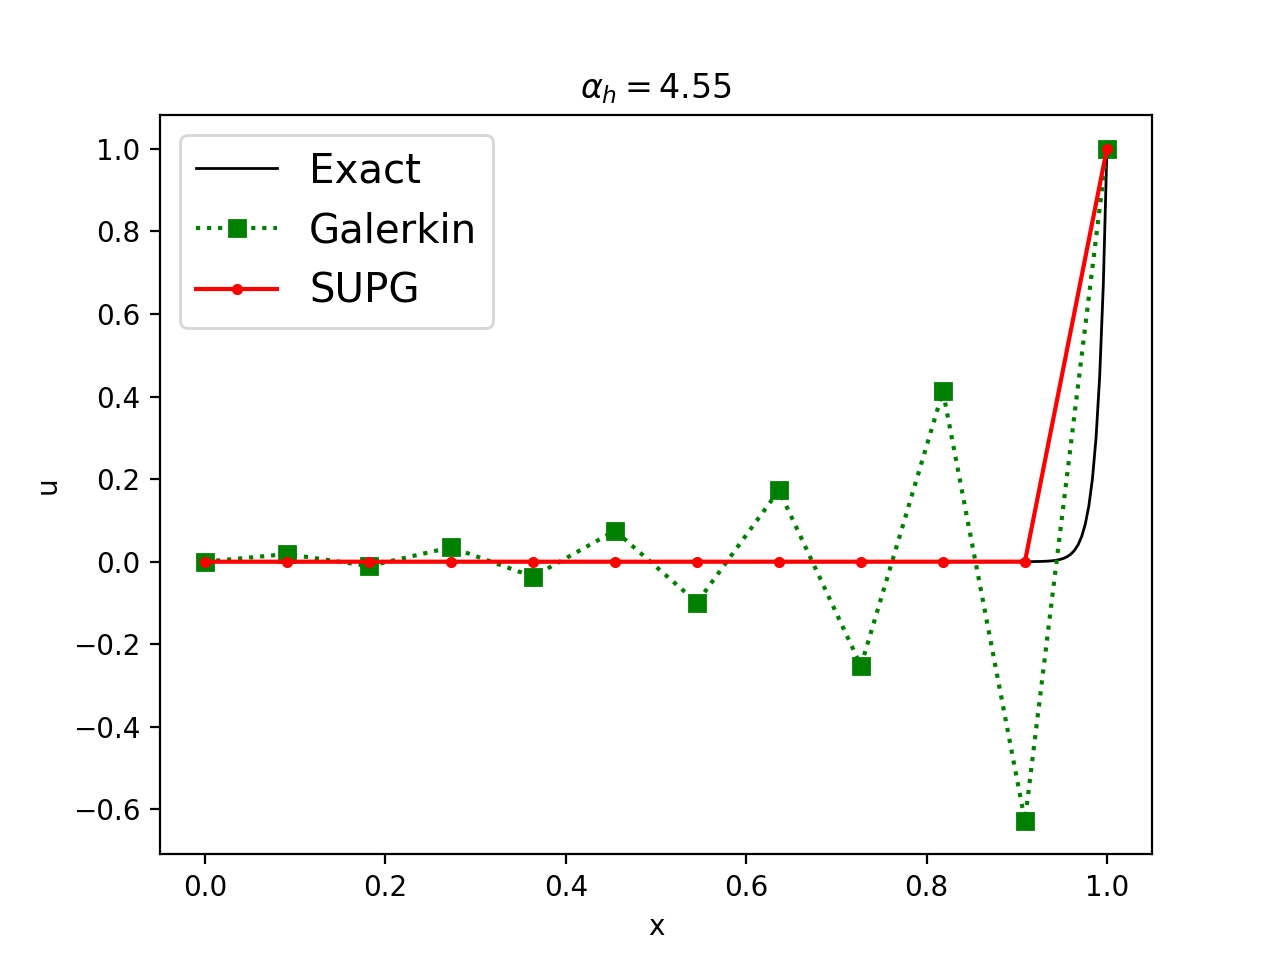

Text(0.5, 1.0, '$\\alpha_h = 4.55$')

In [4]:
alpha = 100 / 22
N =11
x=np.linspace(0,1,12)

#ExactU100, x = Uexact(100)
ExactU100, x0 = Uexact(100, N=250)
GalerkinU100 = USolve(0,1, a=100, XiFlag='Galerkin')
SUPGU100 = USolve(0,1, a=100, XiFlag='SUPG')
 

plt.figure()
plt.plot(x0, ExactU100, '-k', label='Exact', linewidth=1)
#plt.plot(xtest, ExactU1000, '-k', label='Exact')
plt.plot(x, GalerkinU100, 'gs:', label='Galerkin')
plt.plot(x, SUPGU100, '.-r', label='SUPG')

plt.legend(fontsize='14.5')
plt.ylabel(r'u')
plt.xlabel(r'x')
plt.title(r'$\alpha_h = {a:.2f}$'.format(a=alpha))

<IPython.core.display.Javascript object>


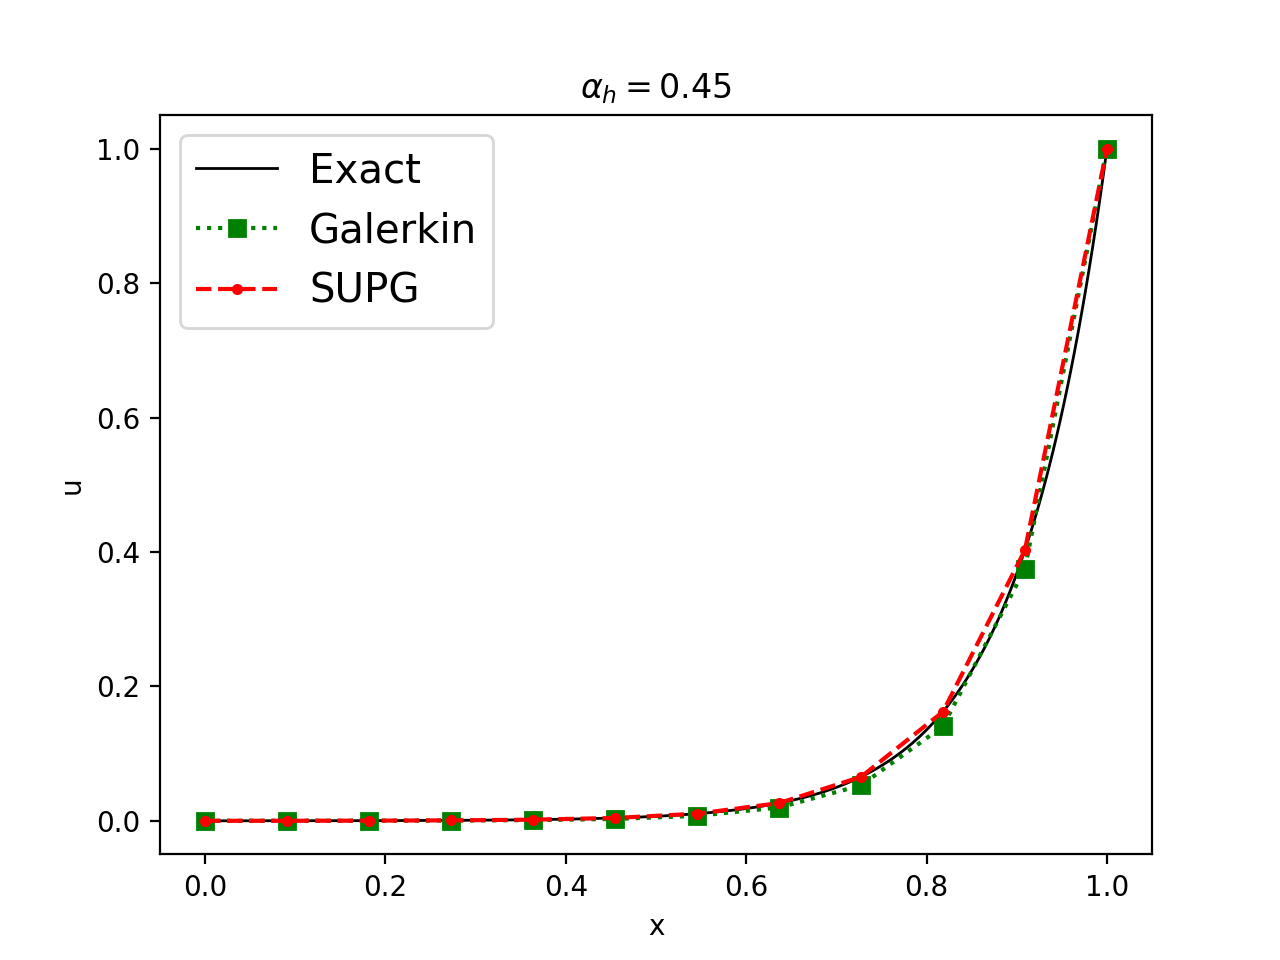

Text(0.5, 1.0, '$\\alpha_h = 0.45$')

In [7]:
alpha = 10 / 22
N =11
x=np.linspace(0,1,12)

ExactU10, x0 = Uexact(10, N=250)
GalerkinU10 = USolve(0,1, a=10, XiFlag='Galerkin')
SUPGU10 = USolve(0,1, a=10, XiFlag='SUPG')
 
plt.figure()  
plt.plot(x0, ExactU10, '-k', label='Exact', linewidth=1)
plt.plot(x, GalerkinU10, 's:g', label='Galerkin')
plt.plot(x, SUPGU10, '.--r', label='SUPG')

plt.legend(fontsize='14.5')
plt.ylabel(r'u')
plt.xlabel(r'x')
plt.title(r'$\alpha_h = {a:.2f}$'.format(a=alpha))

<IPython.core.display.Javascript object>


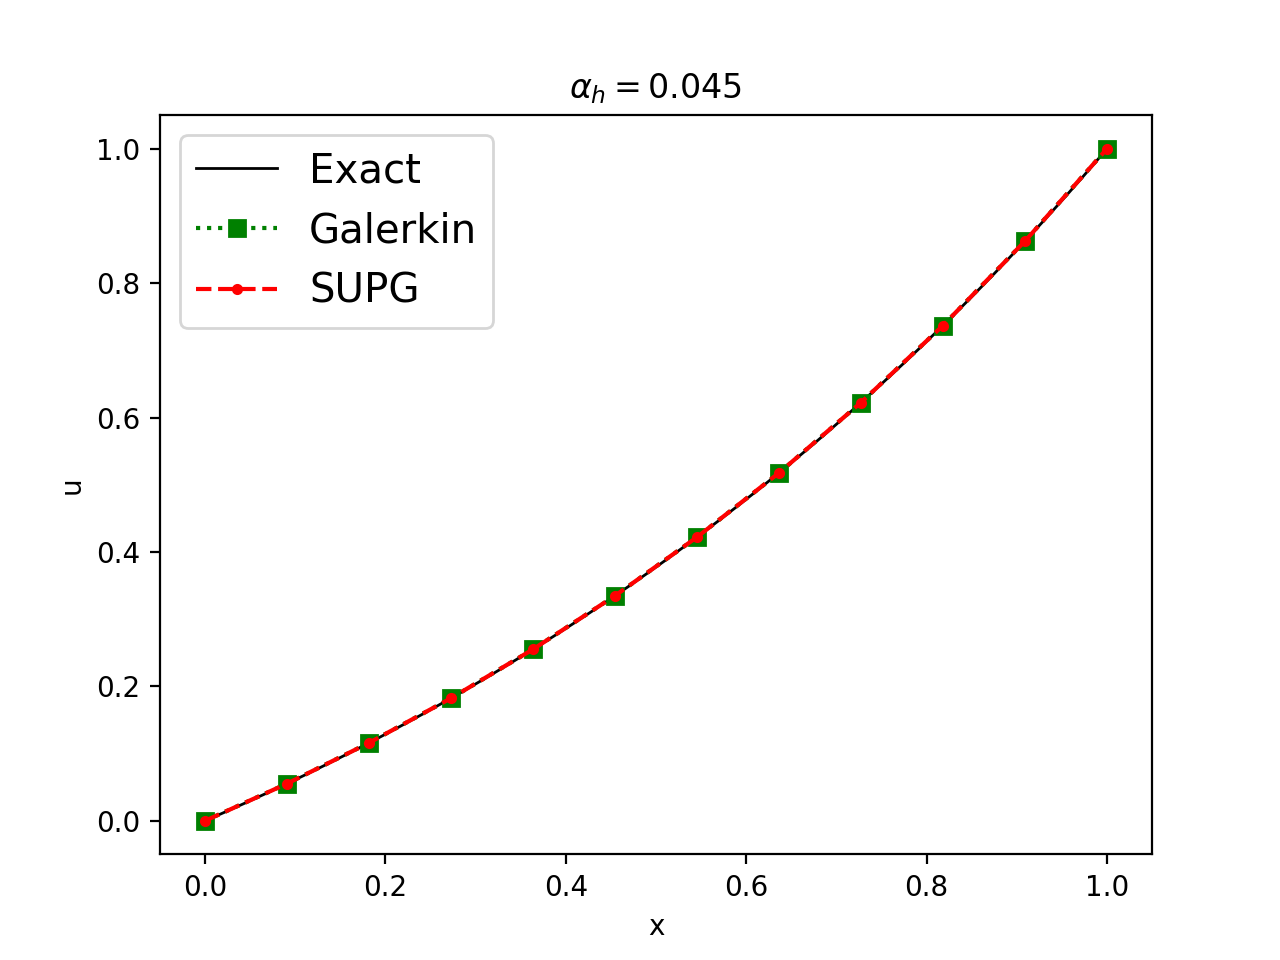

Text(0.5, 1.0, '$\\alpha_h = 0.045$')

In [10]:
alpha = 1 / 22
N =11
x=np.linspace(0,1,12)

ExactU1, x0 = Uexact(1, N=250)
GalerkinU1 = USolve(0,1, a=1, XiFlag='Galerkin')
SUPGU1 = USolve(0,1, a=1, XiFlag='SUPG')
 
plt.figure()  
plt.plot(x0, ExactU1, '-k', label='Exact', linewidth=1)
plt.plot(x, GalerkinU1, 's:g', label='Galerkin')
plt.plot(x, SUPGU1, '.--r', label='SUPG')

plt.legend(fontsize='14.5')
plt.ylabel(r'u')
plt.xlabel(r'x')
plt.title(r'$\alpha_h = {a:.3f}$'.format(a=alpha))

## Problem 1.3

In [19]:
def Basis(A, x, N=11):
    xA = A/N
    xA1 = (A+1)/N
    xAm1 = (A-1)/N
    
    if x <= xA and x > xAm1:
        return N*(x - xAm1)
    elif x > xA and x < xA1:
        return N*(xA1 - x)
    else:
        return 0

def DBasis(A, x, N=11):
    xA = A/N
    xA1 = (A+1)/N
    xAm1 = (A-1)/N
    
    if x <= xA and x > xAm1:
        return N
    elif x > xA and x < xA1:
        return -N
    else:
        return 0
    
def fSource(x, a=1):
    if x>=0 and x<= 3/8:
        return 16 * a * (1 - 4*x)
    elif x >= 3/8 and x<= 1/2:
        return 16 * a * (-2 + 4*x)
    else:
        return 0

#Because both source and basis are piecewise linear, 2point Gaussian quadrature (done carefully) is exact
def twoPointGauss(xAm1, xA):
    xi1 = -1/np.sqrt(3)
    xi2 = 1/np.sqrt(3)
    
    x1 = xi1 * (xA - xAm1)/2 + (xA + xAm1)/2
    x2 = xi2 * (xA - xAm1)/2 + (xA + xAm1)/2
    jacobian = (xA - xAm1)/2
    
    return x1, x2, jacobian


def fElementIntegral(A, function, N=11, a=1): #integral over [x_{A-1}, x_A] of f times function
    
    #As set up, N must be large enough that there is at most one of the special points in the element
    #specialpoints = [3/8, 1/2]
    xA = A/N
    xAm1 = (A-1)/N
    
    #We either have a special point in the element or we don't
    if xAm1 < 3/8 and xA > 3/8:
        x1left, x2left, leftscale = twoPointGauss(xAm1, 3/8)
        x1right, x2right, rightscale = twoPointGauss(3/8, xA)
        
        leftside = leftscale*(fSource(x1left, a)*function(x1left) + fSource(x2left, a)*function(x2left))
        rightside = rightscale*(fSource(x1right, a)*function(x1right) + fSource(x2right, a)*function(x2right))
        
        return leftside + rightside  
    elif xAm1 < 1/2 and xA > 1/2:
        x1left, x2left, leftscale = twoPointGauss(xAm1, 1/2)
        x1right, x2right, rightscale = twoPointGauss(1/2, xA)
        
        leftside = leftscale*(fSource(x1left, a)*function(x1left) + fSource(x2left, a)*function(x2left))
        rightside = rightscale*(fSource(x1right, a)*function(x1right) + fSource(x2right, a)*function(x2right))
        
        return leftside + rightside
    else:
        x1, x2, scale = twoPointGauss(xAm1, xA)
        
        return scale*(fSource(x1, a)*function(x1) + fSource(x2, a)*function(x2))

def fIntegral(function, N=11, a=1): #integral over [0, 1] of f times function. Sum of element integrals
    integralValue = 0
    for A in range(1, N+1):
        integralValue += fElementIntegral(A, function, N=N, a=a)
    
    return integralValue

In [20]:
#Source Vectors
def FGalerkin(N=11):
    F = np.zeros(N-1)
    for i in range(N-1):
        Ni = lambda x: Basis(i+1, x, N=N)
        F[i] = fIntegral(Ni, N=N)
    
    return F
    
def FSUPG(N=11):
    F = np.zeros(N-1)
    h=1/N
    for i in range(N-1):
        Ni = lambda x: Basis(i+1, x, N=N)
        DNi = lambda x: DBasis(i+1, x, N=N)
        F[i] = fIntegral(Ni, N=N) + (h/2) * fIntegral(DNi, N=N)
    
    return F

#Exact Solution
def UfExact(points):
    def UfExactFunction(x):
        if x>=0 and x<= 3/8:
            return 16 * x * (1 - 2*x)
        elif x >= 3/8 and x<= 1/2:
            return 9 + 32*x * (x - 1)
        else:
            return 1
    
    UfX = np.zeros(len(points))
    for i in range(len(points)):
        UfX[i] = UfExactFunction(points[i])
    
    return UfX   

### Plots

<IPython.core.display.Javascript object>


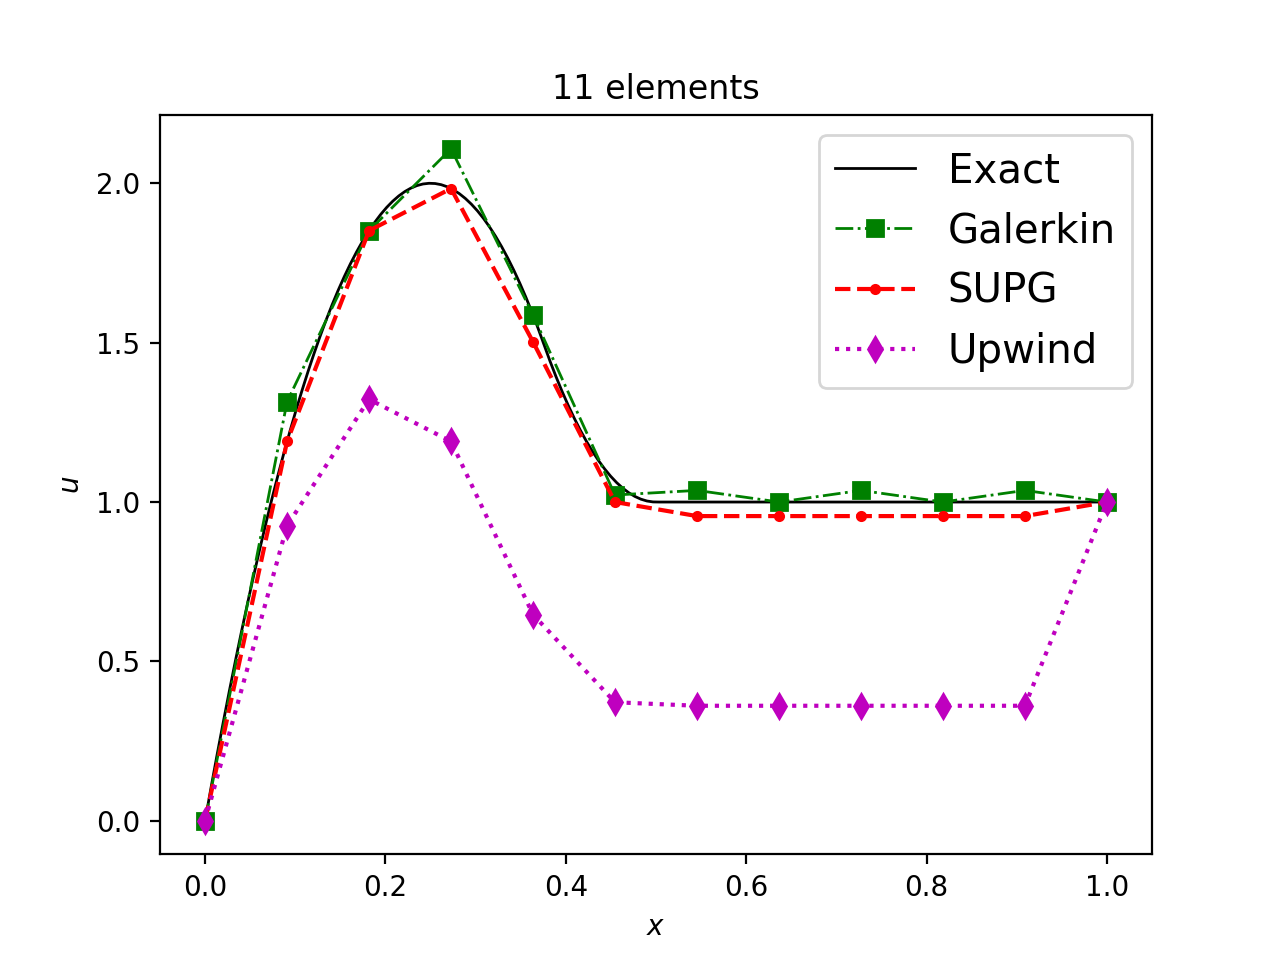

In [297]:
xpoints = np.linspace(0,1, 150)
UfX = UfExact(xpoints)

N=11
x = np.linspace(0, 1, N+1)

UFGalerkin = USolve(0, 1, N=N, a=1, kappa=0, F = FGalerkin(N=N), XiFlag='Galerkin')
UFSUPG = USolve(0, 1, N=N, a=1, kappa=0, F = FSUPG(N=N), XiFlag='SUPG')
UFUpwind = USolve(0, 1, N=N, a=1, kappa=0, F = FGalerkin(N=N), XiFlag='SUPG')

#print(len(xpoints, Uf))
plt.figure()
plt.plot(xpoints, UfX, 'k-', linewidth=1, label='Exact' )
plt.plot(x, UFGalerkin, 'gs-.', linewidth=1, label = 'Galerkin')
plt.plot(x, UFSUPG, 'r.--', label='SUPG')
plt.plot(x, UFUpwind, ':dm', label='Upwind')

plt.ylabel(r'$u$')
plt.xlabel(r'$x$')
plt.title('{} elements'.format(N))

plt.legend(fontsize = 14.5)

<IPython.core.display.Javascript object>


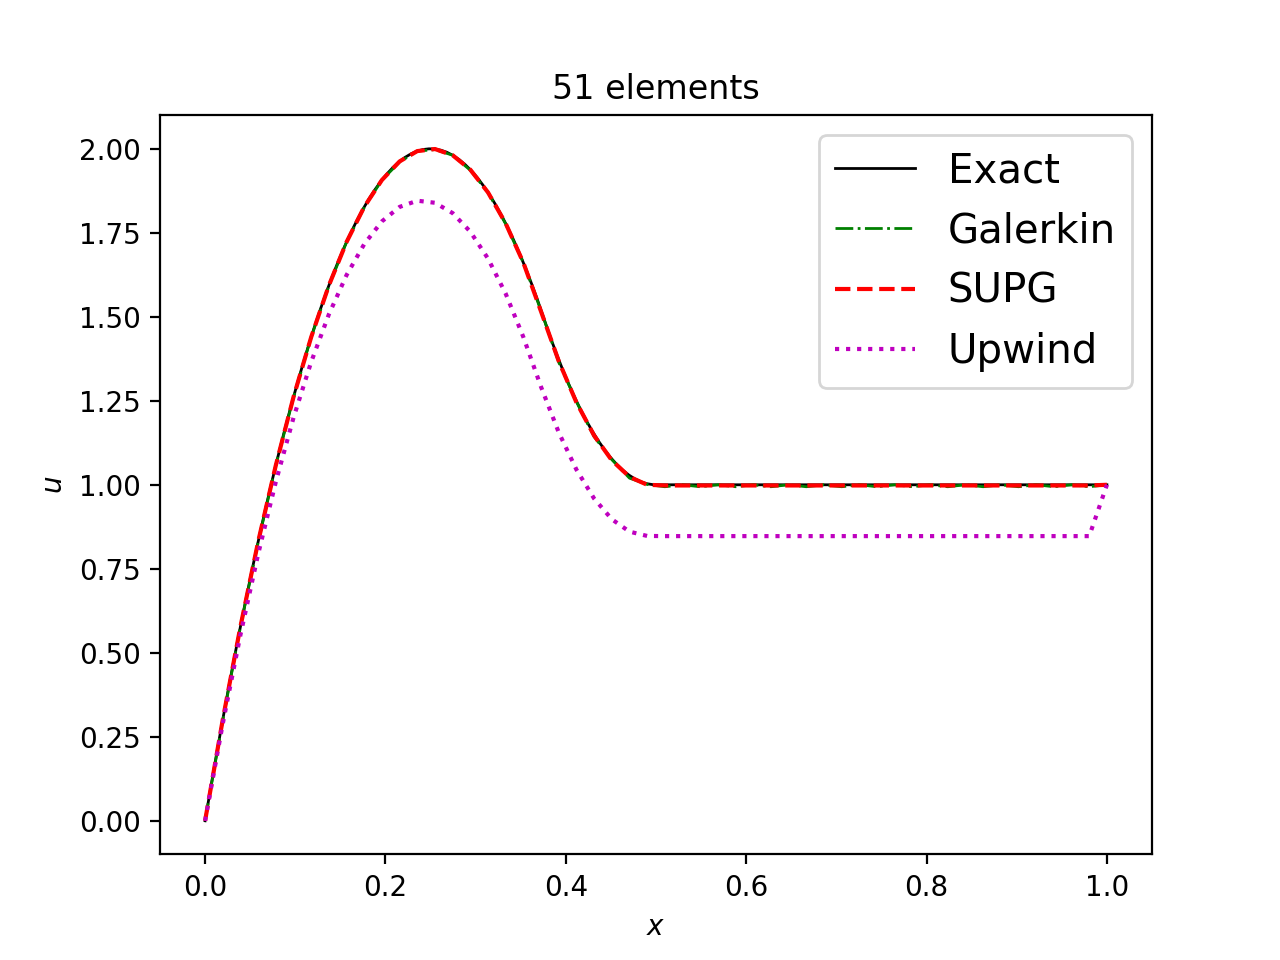

In [35]:
# plots for other discretizations (Np must be odd number for Galerkin K to be invertible)
Np=51

UFGalerkin = USolve(0, 1, N=Np, a=1, kappa=0, F = FGalerkin(N=Np), XiFlag='Galerkin')
UFSUPG = USolve(0, 1, N=Np, a=1, kappa=0, F = FSUPG(N=Np), XiFlag='SUPG')
UFUpwind = USolve(0, 1, N=Np, a=1, kappa=0, F = FGalerkin(N=Np), XiFlag='SUPG')

xpoints = np.linspace(0,1, 150)
UfX = UfExact(xpoints)

x = np.linspace(0, 1, Np+1)

#print(len(xpoints, Uf))
plt.figure()
plt.plot(xpoints, UfX, 'k-', linewidth=1, label='Exact' )
plt.plot(x, UFGalerkin, 'g-.', linewidth=1, label = 'Galerkin')
plt.plot(x, UFSUPG, 'r--', label='SUPG')
plt.plot(x, UFUpwind, ':m', label='Upwind')

plt.ylabel(r'$u$')
plt.xlabel(r'$x$')
plt.title('{} elements'.format(Np))

plt.legend(fontsize = 14.5)